In [1]:
import math
import datetime

class SolarCoordinatesCalculator():
    def __init__(self,lat = 39.49219444, lon = 0.359194444, tZ = 2, date = datetime.date(1999,4,23), hora = (13,0,0)): # lat = 39.49219444, lon = 0.359194444, tZ = 2, date = datetime.date(1999,4,23), hora = (13,0,0)
        self.latitud = lat
        self.longitud = lon
        self.timeZone = tZ
        self.date = date
        self.hora = hora
        self.numNow = self.date2num(self.date)
        self.numHora = self. hora2dd(self.hora)
        
    def date2num(self,now,org = datetime.date(1999,4,23),orgNum = 36273):
        dif = now - org
        dif = dif.days
        num = orgNum + dif
        return num

    def hora2dd(self,H):
        g,m,s = H
        return  ((g*3600)+(m*60)+s)/86400
    
    def dd2dg(self,dd):
        mnt,sec = divmod(dd*3600,60)
        deg,mnt = divmod(mnt,60)
        return deg,mnt,sec
    
    def DJ(self):
        dJ = self.numNow + 2415018.5 + self.numHora - (self.timeZone/24)
        return round(dJ,2)
    
    def SJ(self):
        SJ = (self.DJ() - 2451545) / 36525
        return round(SJ,7)
    
    def L(self):
        L = (280.46646 + (self.SJ() * (36000.76983 + (self.SJ() * 0.0003032)))) % 360
        return L
    
    def g(self):
        g = 357.52911 + self.SJ() * (35999.05029 - 0.0001537 * self.SJ())
        return g
    
    def exc(self):
        exc = 0.016708634 - self.SJ() * (0.000042037 + 0.0000001267 * self.SJ())
        return exc
    
    def eqCtr(self):
        g_rad = self.g() * (math.pi/180)
        eq_ctr = math.sin(g_rad) * (1.914602 - self.SJ() * (0.004817 + 0.000014 * self.SJ())) + math.sin(2 * g_rad) * (0.019993 - 0.000101 * self.SJ()) + math.sin(3 * g_rad) * 0.000289
        return eq_ctr
    
    def L_True(self):
        L_true = self.L() + self.eqCtr()
        return L_true
    
    def g_true(self):
        g_true = self.g() + self.eqCtr()
        return g_true
    
    def radVec(self):
        rad_vec = (1.000001018 * (1 - (self.exc()**2))) / (1 + self.exc() * math.cos(self.g_true()*(math.pi/180)))
        return rad_vec
    
    def L_ap(self):
        aux = (125.04 - 1934.136 * self.SJ()) * (math.pi/180)
        L_ap = self.L_True() - 0.00569 - 0.00478 * math.sin(aux)
        return L_ap
    
    def oblElip(self):
        obl_elip = 23 + (26 + ((21.448 - self.SJ() * (46.815 + self.SJ() * (0.00059 - self.SJ() * 0.001813)))) / 60) / 60
        return obl_elip
    
    def oblCorreg(self):
        aux = (125.04 - 1934.136 * self.SJ()) * (math.pi/180)
        obl_c = self.oblElip() + 0.00256 * math.cos(aux)
        return obl_c
    
    def ascRect(self):
        p1 = math.cos(self.L_ap() * (math.pi/180))
        p2 = math.cos(self.oblCorreg() * (math.pi/180)) * math.sin(self.L_ap() * (math.pi/180))
        asc_r = math.atan2(p2,p1) * (180 / math.pi)
        return asc_r
    
    def Decl(self):
        p1 = math.sin(self.oblCorreg() * (math.pi/180))
        p2 = math.sin(self.L_ap() * (math.pi/180))
        Decl = math.asin(p1*p2) * (180 / math.pi)
        return Decl
    
    def varY(self):
        p1 = (self.oblCorreg() / 2) * (math.pi / 180)
        varY = math.tan(p1) * math.tan(p1)
        return varY
    
    def EdT(self):
        p1 = math.sin(2 * (self.L() * (math.pi/180)))
        p2 = math.sin(self.g() * (math.pi/180))
        p3 = math.sin(self.g() * (math.pi/180))
        p4 = math.cos(2 * (self.L() * (math.pi/180)))
        p5 = math.sin(4 * (self.L() * (math.pi/180)))
        p6 = math.sin(2 * (self.g() * (math.pi/180)))
        EdT = 4 * ((self.varY() * p1 - 2 * self.exc() * p2 + 4 * self.exc() * self.varY() * p3 * p4 - 0.5 * self.varY() * self.varY() * p5 - 1.25 * self.exc() * self.exc() * p3) * (180/math.pi))
        return EdT
    
    def TST(self):
        p = (self.numHora * 1440) + self.EdT() + (4 * self.longitud) - (60 * self.timeZone)
        TST = p % 1440
        return TST
    
    def HA(self):
        if (self.TST()/4 < 0):
            HA = (self.TST()/4) + 180
        else:
            HA = (self.TST()/4) - 180
        return HA
    
    def zenith(self):
        p1 = math.sin(self.latitud * (math.pi/180))
        p2 = math.sin(self.Decl() * (math.pi/180))
        p3 = math.cos(self.latitud * (math.pi/180))
        p4 = math.cos(self.Decl() * (math.pi/180))
        p5 = math.cos(self.HA() * (math.pi/180))
        zenith = math.acos(p1 * p2 + p3 * p4 * p5) * (180/math.pi)
        return zenith
    
    def Elevacion(self):
        elev = 90 - self.zenith()
        return elev
    
    def AtmRef(self):
        if self.Elevacion() > 85:
            AtmRef = 0
        else:
            if self.Elevacion() > 5:
                AtmRef = 58.1 / math.tan(self.Elevacion() * (math.pi/180)) - 0.07 / math.tan((self.Elevacion() * (math.pi/180)) ** 3) + 0.000086 / math.tan((self.Elevacion() * (math.pi/180)) ** 5)
            else:
                if self.Elevacion() > -0.575:
                    AtmRef = 1735 + self.Elevacion() * (-518.2 + self.Elevacion() * (103.4 + self.Elevacion() * (-12.79 + self.Elevacion() * 0.711)))
                else:
                    AtmRef = -20.772 / math.tan(self.Elevacion() * (math.pi/180))
        AtmRef = AtmRef/3600
        return AtmRef
    
    def Elevacion_c(self):
        Elevacion_c = self.Elevacion() + self.AtmRef()
        return Elevacion_c
    
    def Azimuth(self):
        if self.HA() > 0:
            azimut = (((math.acos(((math.sin((self.latitud) * (math.pi/180)) * math.cos((self.zenith()) * (math.pi/180))) - 
                                   (math.sin((self.Decl()) * (math.pi/180)))) / (math.cos((self.latitud) * (math.pi/180)) * 
                                                                                 math.sin((self.zenith()) * (math.pi/180)))))
                       * (180/math.pi)) + 180) % 360
        else:
            azimut = (540 - ((math.acos(((math.sin((self.latitud) * (math.pi/180)) * math.cos((self.zenith()) * (math.pi/180))) -
                                         (math.sin((self.Decl()) * (math.pi/180))))/(math.cos((self.latitud) * (math.pi/180)) * 
                                                                                     math.sin((self.zenith()) * (math.pi/180))))) * 
                             (180/math.pi))) % 360
        return azimut
    
    def show(self):
        azimut = self.Azimuth()
        azimut = self.dd2dg(azimut)
        elevacion = self.Elevacion_c()
        elevacion = self.dd2dg(elevacion)
        print(f'AZIMUTH   =   {azimut[0]}° {azimut[1]}\' {round(azimut[2],2)}\"')
        print(f'ELEVACION =   {elevacion[0]}° {elevacion[1]}\' {round(elevacion[2],2)}\"')
        
    def compute(self):
        azimut = self.Azimuth()
        elevacion = self.Elevacion_c()
        return azimut,elevacion


SCC = SolarCoordinatesCalculator()# self, lat = -37.814, lon = 144.963317, tZ = 10, date = datetime.date(1999,4,23), hora = (0,13,0)
SCC.show()
# SCC.compute()

AZIMUTH   =   151.0° 3.0' 34.03"
ELEVACION =   60.0° 10.0' 47.76"


In [35]:
import math
import datetime

# funciones

def dd2dg(dd):
    mnt,sec = divmod(dd*3600,60)
    deg,mnt = divmod(mnt,60)
    return deg,mnt,sec

def date2num(now,org = datetime.date(1999,4,23),orgNum = 36273):
    dif = now - org
    dif = dif.days
    num = orgNum + dif
    
    return num

def hora2dd(H):
    g,m,s = H
    return  ((g*60)+(m*60)+s)/86400

latitud = 39.49219444
longitud = 0.359194444
timeZone = 2
now = datetime.date(2020,9,5)
hora = 17,50,0

numNow = date2num(now)
numHora = hora2dd(hora)

#dia juliano
diaJuliano = numNow + 2415018.5 + numHora - (timeZone/24)
diaJuliano

# siglo juliano
sigloJuliano = (diaJuliano - 2451545) / 36525
sigloJuliano

# Longitud media geometrica del sol
L = (280.46646 + (sigloJuliano * (36000.76983 + (sigloJuliano * 0.0003032)))) % 360
L

# anomalia media geometrica del sol
g = 357.52911 + sigloJuliano * (35999.05029 - 0.0001537 * sigloJuliano)
g

# excentricidad de la orbita terrestre
exc = 0.016708634 - sigloJuliano * (0.000042037 + 0.0000001267 * sigloJuliano)
exc

# ecuacion del centro del sol
g_rad = g * (math.pi/180)

eq_ctr = math.sin(g_rad) * (1.914602 - sigloJuliano * (0.004817 + 0.000014 * sigloJuliano)) + math.sin(2 * g_rad) * (0.019993 - 0.000101 * sigloJuliano) + math.sin(3 * g_rad) * 0.000289
eq_ctr

# longitud verdadera del sol
L_true = L + eq_ctr
L_true

# anomalia verdadera del sol
g_true = g + eq_ctr
g_true

# vector de radiacion del sol
rad_vec = (1.000001018 * (1 - (exc**2))) / (1 + exc * math.cos(g_true*(math.pi/180)))
rad_vec

# Longitud aparente del sol
aux = (125.04 - 1934.136 * sigloJuliano) * (math.pi/180)
L_ap = L_true - 0.00569 - 0.00478 * math.sin(aux)
L_ap

# oblicuidad media de la eliptica
obl_elip = 23 + (26 + ((21.448 - sigloJuliano * (46.815 + sigloJuliano * (0.00059 - sigloJuliano * 0.001813)))) / 60) / 60
obl_elip

# oblicuidad corregida
obl_c = obl_elip + 0.00256 * math.cos(aux)
obl_c

# ascension recta del sol
p1 = math.cos(L_ap * (math.pi/180))
p2 = math.cos(obl_c * (math.pi/180)) * math.sin(L_ap * (math.pi/180))

asc_r = math.atan2(p2,p1) * (180 / math.pi)
asc_r

# Declinacion del sol
p1 = math.sin(obl_c * (math.pi/180))
p2 = math.sin(L_ap * (math.pi/180))

Decl = math.asin(p1*p2) * (180 / math.pi)
Decl

# variacion y
p1 = (obl_c / 2) * (math.pi / 180)
varY = math.tan(p1) * math.tan(p1)
varY

# ecuacion del tiempo
p1 = math.sin(2 * (L * (math.pi/180)))
p2 = math.sin(g * (math.pi/180))
p3 = math.sin(g * (math.pi/180))
p4 = math.cos(2 * (L * (math.pi/180)))
p5 = math.sin(4 * (L * (math.pi/180)))
p6 = math.sin(2 * (g * (math.pi/180)))
EdT = 4 * ((varY * p1 - 2 * exc * p2 + 4 * exc * varY * p3 * p4 - 0.5 * varY * varY * p5 - 1.25 * exc * exc * p3) * (180/math.pi))
print(EdT)

# tiempo solar verdadero
p = (numHora * 1440) + EdT + (4 * longitud) - (60 * timeZone)
TST = p % 1440
TST

# Angulo Horario (HA)
if (TST/4 < 0):
    HA = (TST/4) + 180
else:
    HA = (TST/4) - 180
HA

# Angulo del Zenith Solar
p1 = math.sin(latitud * (math.pi/180))
p2 = math.sin(Decl * (math.pi/180))
p3 = math.cos(latitud * (math.pi/180))
p4 = math.cos(Decl * (math.pi/180))
p5 = math.cos(HA * (math.pi/180))

zenith = math.acos(p1 * p2 + p3 * p4 * p5) * (180/math.pi)
zenith

# Angulo de elevación del sol
Elevacion = 90 - zenith
Elevacion

# Refraccion atmosferica aprox
if Elevacion > 85:
    AtmRef = 0
else:
    if Elevacion > 5:
        AtmRef = 58.1 / math.tan(Elevacion * (math.pi/180)) - 0.07 / math.tan((Elevacion * (math.pi/180)) ** 3) + 0.000086 / math.tan((Elevacion * (math.pi/180)) ** 5)
    else:
        if Elevacion > -0.575:
            AtmRef = 1735 + Elevacion * (-518.2 + Elevacion * (103.4 + Elevacion * (-12.79 + Elevacion * 0.711)))
        else:
            AtmRef = -20.772 / math.tan(Elevacion * (math.pi/180))
                                        
AtmRef = AtmRef/3600
AtmRef

# Elevacion solar corregida con la refraccion atmosferica
Elevacion_c = Elevacion + AtmRef
Elevacion_c

# Angulo azimuth solar

if HA > 0:
    azimut = (((math.acos(((math.sin((latitud) * (math.pi/180)) * math.cos((zenith) * (math.pi/180))) - (math.sin((Decl) * (math.pi/180)))) / (math.cos((latitud) * (math.pi/180)) * math.sin((zenith) * (math.pi/180))))) * (180/math.pi)) + 180) % 360
else:
    azimut = (540 - ((math.acos(((math.sin((latitud) * (math.pi/180)) * math.cos((zenith) * (math.pi/180)))-(math.sin((Decl) * (math.pi/180))))/(math.cos((latitud) * (math.pi/180)) * math.sin((zenith) * (math.pi/180))))) * (180/math.pi))) % 360

print(f"AZIMUT = {dd2dg(azimut)}\nELEVACION = {dd2dg(Elevacion_c)}")

1.402990175570488
AZIMUT = (343.0, 2.0, 18.405408040620387)
ELEVACION = (-43.0, 39.0, 48.393453993077856)


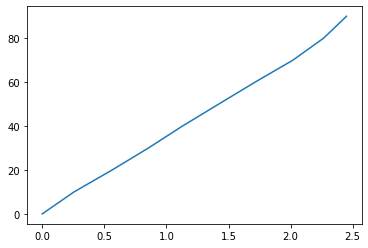

In [1]:
import matplotlib.pyplot as plt

x = [0,0.256, 0.563, 0.855, 1.1292, 1.4209, 1.714, 2.018, 2.265, 2.45]
y = [0,10,    20,    30,    40,     50,     60,    70,    80,    90]

plt.plot(x,y)
plt.show()